## Generating and Understanding Realistic Social Network Graphs

Creating a realistic social network graph involves generating a network with properties commonly found in real-world social networks. This guide combines theoretical aspects and a practical step-by-step approach to constructing such graphs.

### Key Properties of Social Network Graphs

1. **Nodes and Edges**:
    - **Description**: Nodes (vertices) represent individuals or entities in the network. Edges (links) represent relationships or interactions between these nodes. In directed graphs, edges have a direction, indicating the relationship flow from one node to another.
    - **Example**: Imagine each person in a classroom as a node. Each node represents a person. If two students are friends, draw a line (edge) connecting their nodes. In directed graphs, the edges have arrows to show who follows whom.

2. **Scale-Free Network**:
    - **Description**: Social networks often exhibit a power-law degree distribution, meaning a few nodes (people) have many connections (follows), while most have few.
    - **Example**: In a social network, most people have a few friends, while a few people (like influencers) have many friends. This is like in a classroom where most students have a few close friends, but a popular student might be friends with almost everyone.

3. **Small-World Phenomenon**:
    - **Description**: The average path length between nodes is small, and the network has a high clustering coefficient.
    - **Example**: This is the average number of steps it takes to get from one person to another in the network. Imagine how many handshakes it would take for a message to go from one student to any other student in a school. In social networks, this number is usually small, meaning you can reach anyone through a few connections.

4. **Clustering Coefficient**:
    - **Description**: The clustering coefficient indicates the degree to which nodes tend to cluster together. Real-world social networks tend to have a high clustering coefficient.
    - **Example**: Think of a group of friends in a school. If your friend circles overlap a lot (your friends are also friends with each other), this is a high clustering coefficient. It's like a tightly knit group where everyone knows everyone else.

5. **Community Structure**:
    - **Description**: Nodes tend to form densely connected groups, known as communities, within the larger network. These communities often represent real-world social groups.
    - **Example**: People often form groups based on interests, like sports teams or music clubs. In a school, you might have groups of students who hang out together because they share the same hobbies or classes. These groups are like communities in a social network.

6. **Reciprocity**:
    - **Description**: In directed social networks, there is often a significant probability that if one node follows another, the relationship is reciprocated.
    - **Example**: In social networks, if you follow someone, they might follow you back. In a school context, if you consider someone your friend, there's a good chance they consider you a friend as well.

7. **Homophily**:
    - **Description**: Homophily is the tendency of individuals to connect with others who are similar to themselves.
    - **Example**: This is the tendency of individuals to connect with others who are similar to them. For example, in a school, students who like the same subjects or hobbies are more likely to become friends.

### Step-by-Step Approach to Constructing a Realistic Social Network Graph

#### 1. **Generate Base Graph**:
- **Method**: Use the **Barabási–Albert (BA) model** for preferential attachment to create a scale-free network, which will generate the hubs and influencers typical of social networks.
- **Example**: Start with a small group of students. New students join the group and are more likely to become friends with those who already have many friends, mimicking how popular kids get more friends.

#### 2. **Add Small-World Properties**:
- **Method**: Use the **Watts-Strogatz model** to introduce small-world properties with high clustering and short path lengths.
- **Example**: Imagine reassigning some friendships randomly while keeping most of the original ones. This creates shortcuts between distant groups, like when students from different classes become friends, reducing the degrees of separation.

#### 3. **Add Homophily Edges**:
- **Purpose**: Increase the probability of connections between nodes with similar attributes.
- **Example**: If students with the same favorite subject are more likely to become friends, then add more connections between these students.

#### 4. **Add Community Structure**:
- **Method**: Use the **Louvain method** for community detection to simulate real-world social groups or interest-based clusters.
- **Example**: Detect groups of students who hang out together a lot and add more friendships within these groups, like reinforcing bonds within a sports team or a music club.

#### 5. **Introduce Reciprocity**:
- **Purpose**: Implement reciprocal connections with a certain probability, reflecting the mutual follows in social networks.
- **Example**: If one student considers another a friend, there's a good chance the feeling is mutual. Add a friendship in the opposite direction to reflect this.

#### 6. **Add Random Edges**:
- **Purpose**: Introduce a small number of random edges to simulate spontaneous connections.
- **Example**: Occasionally, students become friends through chance meetings, like sitting next to each other in a new class or meeting at a school event. Add a few random friendships to simulate these spontaneous connections.

### Limitations and Exclusions

1. **Simplified Attributes**:
    - **Description**: The model uses simple attributes like "interest" to simulate homophily, which may not capture the full complexity of real-world social attributes.
    - **Example**: Real friendships depend on many factors, not just shared interests. The model might miss nuances like personality compatibility or shared history.

2. **Static Network**:
    - **Description**: The generated network is static, while real social networks are dynamic and evolve over time.
    - **Example**: Friendships can change; new students join, and others graduate. The model doesn't account for these changes.

3. **Limited Node and Edge Attributes**:
    - **Description**: The model does not include weights or other detailed attributes on edges and nodes, which can be important in more nuanced analyses.
    - **Example**: Friendships can vary in strength, but the model treats all friendships as equal.

4. **Single-Level Community Detection**:
    - **Description**: The Louvain method detects communities at a single level, while real social networks may have hierarchical or multi-level community structures.
    - **Example**: A sports team might have subgroups based on positions or age, which the model might not capture.

5. **Uniform Edge Probability**:
    - **Description**: The probability of adding edges (homophily, reciprocal, random) is uniform across the network, which may not reflect the varying likelihood of connections in different parts of a real network.
    - **Example**: In real life, some students are more likely to make friends than others due to their outgoing nature or involvement in multiple activities, but the model applies the same probability uniformly.

By following this step-by-step approach, we can create a realistic social network graph that captures many of the essential properties of real-world social networks. However, it is important to recognize the limitations and exclusions of this model to understand its applicability and potential areas for further enhancement.

In [1]:
import random

import community as community_louvain
import matplotlib.pyplot as plt
import networkx as nx
import powerlaw
from networkx import DiGraph

## Generate names and bios

In [2]:
# import json
# import os

# from openai import OpenAI

# os.environ["OPENAI_API_KEY"] = "<OPENAI_API_KEY>"

# # Initialize the OpenAI client
# client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY"))


# def generate_people(num_people: int) -> list[dict[str, str]]:
#     """Generate a list of people with names and short bios."""
#     functions = [
#         {
#             "name": "create_people_list",
#             "description": "Generate a list of people with names and short bios",
#             "parameters": {
#                 "type": "object",
#                 "properties": {
#                     "people": {
#                         "type": "array",
#                         "items": {
#                             "type": "object",
#                             "properties": {"name": {"type": "string"}, "bio": {"type": "string"}},
#                             "required": ["name", "bio"],
#                         },
#                     }
#                 },
#                 "required": ["people"],
#             },
#         }
#     ]

#     response = client.chat.completions.create(
#         model="gpt-3.5-turbo",
#         messages=[
#             {
#                 "role": "system",
#                 "content": "You are a helpful assistant that generates random names and short bios for an extremely diverse range of people.",
#             },
#             {
#                 "role": "user",
#                 "content": f"Generate {num_people} random names and short bios (maximum 2 sentences each) for fictional people. Include an extremely wide range of individuals, such as children, accomplished professionals, celebrities, ex-convicts, and everyone in between. Ensure a mix of ages, backgrounds, occupations, and life experiences. The range should span from very successful to struggling individuals.",
#             },
#         ],
#         functions=functions,
#         function_call={"name": "create_people_list"},
#     )

#     # Extract the function call from the response
#     function_call = response.choices[0].message.function_call

#     # Parse the arguments as JSON
#     arguments = json.loads(function_call.arguments)

#     return arguments["people"]


# # Generate a list of people
# num_people = 50
# names_bios = generate_people(num_people)

# # Print the result
# for person in names_bios:
#     print(f"Name: {person['name']}")
#     print(f"Bio: {person['bio']}")
#     print()

In [3]:
# List of names and bios
names_bios = [
    {"name": "John Smith", "bio": "A high school student passionate about robotics."},
    {
        "name": "Emma Johnson",
        "bio": "An accomplished heart surgeon with over 20 years of experience.",
    },
    {"name": "Oliver Williams", "bio": "A retired teacher who now enjoys gardening and painting."},
    {"name": "Sophia Brown", "bio": "A software developer working on innovative AI projects."},
    {"name": "Liam Jones", "bio": "A famous actor known for their roles in action movies."},
    {
        "name": "Ava Garcia",
        "bio": "A single mother of three, working two jobs to support her family.",
    },
    {"name": "Mason Miller", "bio": "A recent college graduate looking for a job in marketing."},
    {
        "name": "Isabella Davis",
        "bio": "A professional dancer who has performed on stages worldwide.",
    },
    {
        "name": "James Martinez",
        "bio": "An ex-convict trying to rebuild his life and find steady employment.",
    },
    {"name": "Mia Wilson", "bio": "A chef who owns a popular vegan restaurant."},
    {
        "name": "Noah Anderson",
        "bio": "A firefighter dedicated to saving lives and helping the community.",
    },
    {
        "name": "Amelia Thomas",
        "bio": "A university professor specializing in environmental science.",
    },
    {
        "name": "Elijah Lee",
        "bio": "A talented musician who plays the violin in a symphony orchestra.",
    },
    {"name": "Emily Harris", "bio": "A stay-at-home parent who homeschools her children."},
    {"name": "Benjamin Clark", "bio": "A startup founder developing a new social media platform."},
    {"name": "Harper Lewis", "bio": "A travel blogger who has visited over 50 countries."},
    {"name": "Lucas Young", "bio": "A high school dropout working hard to get his GED."},
    {"name": "Ella Walker", "bio": "A nurse providing compassionate care in a busy hospital."},
    {"name": "Henry Hall", "bio": "A retired police officer who now volunteers in his community."},
    {"name": "Grace Allen", "bio": "An artist known for her vibrant abstract paintings."},
    {"name": "Alexander King", "bio": "A financial analyst working at a major investment bank."},
    {"name": "Charlotte Wright", "bio": "A yoga instructor who promotes holistic wellness."},
    {"name": "Daniel Scott", "bio": "An author who writes best-selling crime novels."},
    {"name": "Zoe Green", "bio": "A barista with dreams of opening her own coffee shop."},
    {"name": "David Baker", "bio": "A software engineer working at a tech giant."},
    {"name": "Scarlett Gonzalez", "bio": "A college student studying marine biology."},
    {"name": "Matthew Perez", "bio": "An electrician with over 15 years of experience."},
    {"name": "Victoria Roberts", "bio": "A lawyer specializing in intellectual property."},
    {"name": "Sebastian Turner", "bio": "A professional athlete playing for a top football team."},
    {"name": "Sofia Phillips", "bio": "A high school teacher passionate about literature."},
    {"name": "Ethan Campbell", "bio": "A car mechanic with a love for classic cars."},
    {"name": "Luna Parker", "bio": "A fashion designer who launched her own clothing line."},
    {"name": "Logan Evans", "bio": "A paramedic who saves lives in emergency situations."},
    {"name": "Aria Edwards", "bio": "A veterinarian dedicated to animal welfare."},
    {"name": "Jacob Collins", "bio": "A construction worker who enjoys building homes."},
    {"name": "Chloe Stewart", "bio": "A social media influencer with millions of followers."},
    {"name": "William Sanchez", "bio": "A marine who served in the military for over a decade."},
    {"name": "Abigail Morris", "bio": "A librarian who loves to promote reading in her community."},
    {"name": "Jack Rogers", "bio": "An entrepreneur who runs a successful tech startup."},
    {"name": "Avery Reed", "bio": "A kindergarten teacher who loves working with children."},
    {"name": "Samuel Cook", "bio": "A chef renowned for his innovative culinary creations."},
    {"name": "Lily Morgan", "bio": "A nurse practitioner working in a rural health clinic."},
    {"name": "Michael Bell", "bio": "A truck driver who enjoys the open road."},
    {"name": "Isla Murphy", "bio": "A graphic designer working for a major advertising agency."},
    {
        "name": "Carter Bailey",
        "bio": "A recent high school graduate planning to study engineering.",
    },
    {"name": "Ella Rivera", "bio": "A pastry chef who creates stunning desserts."},
    {"name": "Daniel Foster", "bio": "A retired soldier now working as a security consultant."},
    {"name": "Madison Price", "bio": "A wedding planner known for creating memorable events."},
    {"name": "Lucas Howard", "bio": "A data scientist working on cutting-edge AI research."},
    {"name": "Mila Ward", "bio": "An actress starring in popular TV shows."},
    {"name": "Mason Brooks", "bio": "A landscape architect designing beautiful outdoor spaces."},
    {"name": "Ella Hughes", "bio": "A recent graduate now working as a journalist."},
    {"name": "Owen Bennett", "bio": "A software developer passionate about open-source projects."},
    {"name": "Aubrey Cooper", "bio": "A digital marketer helping small businesses grow online."},
    {"name": "Jackson Flores", "bio": "A high school student excelling in science and math."},
    {"name": "Mia Sanders", "bio": "A fashion model traveling the world for photo shoots."},
    {"name": "Logan Ross", "bio": "An architect designing innovative residential buildings."},
    {
        "name": "Sophie Powell",
        "bio": "A fitness trainer helping clients achieve their health goals.",
    },
    {"name": "Grayson Long", "bio": "A musician who plays the guitar in a rock band."},
    {"name": "Avery Patterson", "bio": "A college professor teaching psychology."},
    {"name": "Gabriel Hughes", "bio": "A plumber with a reputation for excellent service."},
    {"name": "Lily Price", "bio": "A ballet dancer performing with a prestigious company."},
    {"name": "Cameron Butler", "bio": "A lawyer working in criminal defense."},
    {"name": "Elizabeth Simmons", "bio": "A writer who publishes historical fiction novels."},
    {"name": "Wyatt Myers", "bio": "A high school student who loves playing soccer."},
    {"name": "Natalie Foster", "bio": "A nurse working in a pediatric hospital."},
    {"name": "Isaac Bailey", "bio": "A chemist researching renewable energy solutions."},
    {"name": "Hannah Rivera", "bio": "A marketing executive at a leading fashion brand."},
    {"name": "Julian Green", "bio": "A graphic novelist creating captivating stories."},
    {"name": "Grace Sanders", "bio": "A high school principal dedicated to improving education."},
    {
        "name": "Landon Ross",
        "bio": "An investment banker with a focus on mergers and acquisitions.",
    },
    {
        "name": "Victoria Wood",
        "bio": "A political activist advocating for climate change policies.",
    },
    {"name": "David James", "bio": "A marine biologist studying coral reef ecosystems."},
    {"name": "Scarlett Bell", "bio": "An actress known for her roles in independent films."},
    {"name": "Joseph Wright", "bio": "A chef specializing in French cuisine."},
    {"name": "Aiden Hayes", "bio": "A professional gamer competing in international tournaments."},
    {"name": "Luna Reed", "bio": "A social worker helping families in crisis."},
    {"name": "Caleb Price", "bio": "A software developer creating mobile applications."},
    {"name": "Penelope Foster", "bio": "A high school teacher passionate about history."},
    {"name": "Nathaniel Richardson", "bio": "An engineer working on sustainable energy projects."},
    {"name": "Samantha Coleman", "bio": "A florist known for her beautiful arrangements."},
    {"name": "Hunter Russell", "bio": "A professional skateboarder with several sponsorships."},
    {"name": "Leah Griffin", "bio": "A marketing manager at a tech company."},
    {"name": "Owen Brooks", "bio": "A college student studying computer science."},
    {"name": "Charlotte Webb", "bio": "A librarian who loves to promote reading in her community."},
    {"name": "Andrew Sanders", "bio": "A restaurant owner known for his farm-to-table menu."},
    {"name": "Ellie Murphy", "bio": "A high school student who enjoys playing the piano."},
    {"name": "Isaac Hughes", "bio": "A chef renowned for his innovative culinary creations."},
    {
        "name": "Savannah Gray",
        "bio": "A recent college graduate looking for a job in digital marketing.",
    },
    {"name": "Ethan Diaz", "bio": "A tattoo artist with a unique and creative style."},
    {"name": "Aria Patel", "bio": "An engineer working on sustainable energy projects in India."},
    {"name": "Mason Lee", "bio": "A professional gamer competing in international tournaments."},
    {"name": "Layla Martinez", "bio": "A social worker helping families in crisis."},
    {"name": "Caleb Price", "bio": "A software developer creating mobile applications."},
    {"name": "Penelope Foster", "bio": "A high school teacher passionate about history."},
    {"name": "Nathaniel Richardson", "bio": "An engineer working on sustainable energy projects."},
    {"name": "Samantha Coleman", "bio": "A florist known for her beautiful arrangements."},
    {"name": "Hunter Russell", "bio": "A professional skateboarder with several sponsorships."},
    {"name": "Leah Griffin", "bio": "A marketing manager at a tech company."},
    {"name": "Owen Brooks", "bio": "A college student studying computer science."},
    {"name": "Charlotte Webb", "bio": "A librarian who loves to promote reading in her community."},
    {"name": "Andrew Sanders", "bio": "A restaurant owner known for his farm-to-table menu."},
    {"name": "Ellie Murphy", "bio": "A high school student who enjoys playing the piano."},
    {"name": "Isaac Hughes", "bio": "A chef renowned for his innovative culinary creations."},
    {
        "name": "Savannah Gray",
        "bio": "A recent college graduate looking for a job in digital marketing.",
    },
    {"name": "Ethan Diaz", "bio": "A tattoo artist with a unique and creative style."},
    {
        "name": "Aria Patel",
        "bio": "A community organizer working to improve local infrastructure in rural areas.",
    },
    {"name": "Mohamed Ali", "bio": "A taxi driver who enjoys sharing stories with his passengers."},
    {
        "name": "Fatima Begum",
        "bio": "A passionate human rights activist fighting for women's rights.",
    },
    {"name": "Chen Liu", "bio": "A research scientist specializing in nanotechnology."},
    {
        "name": "Aisha Mohamed",
        "bio": "A successful entrepreneur running a tech company in Nairobi.",
    },
    {"name": "Miguel Hernandez", "bio": "A farmworker advocating for better labor conditions."},
    {"name": "Ananya Gupta", "bio": "A documentary filmmaker highlighting social issues."},
    {"name": "Jorge Ramirez", "bio": "A young athlete aspiring to join the national soccer team."},
    {"name": "Mei Wong", "bio": "A traditional Chinese medicine practitioner."},
    {"name": "Keisha Brown", "bio": "A spoken word poet who performs at local events."},
    {"name": "Nina Petrova", "bio": "A ballet dancer performing with a prestigious company."},
    {"name": "Hassan Ahmed", "bio": "An engineer developing affordable housing solutions."},
    {"name": "Juan Torres", "bio": "A chef specializing in fusion cuisine."},
    {"name": "Priya Sharma", "bio": "A lawyer working on international human rights cases."},
    {
        "name": "Lars Svensson",
        "bio": "A software developer from Sweden creating mobile applications.",
    },
    {
        "name": "Aya Nakamura",
        "bio": "A fashion designer from Japan known for her avant-garde style.",
    },
    {
        "name": "Yara Saad",
        "bio": "An architect designing sustainable buildings in the Middle East.",
    },
    {"name": "Carlos Mendez", "bio": "A community leader working to reduce gang violence."},
    {"name": "Amara Nwosu", "bio": "A nurse providing healthcare services in rural Nigeria."},
    {"name": "Hans Müller", "bio": "A retired engineer who now enjoys woodworking."},
    {
        "name": "Anna Novak",
        "bio": "A graphic designer from Poland working for a major advertising agency.",
    },
    {"name": "Mateo Silva", "bio": "A student studying to become a marine biologist."},
    {"name": "Khadija Ali", "bio": "A teacher advocating for girls' education in Somalia."},
    {"name": "Andrei Popov", "bio": "A software engineer from Russia working on AI research."},
    {
        "name": "María Rodríguez",
        "bio": "A journalist reporting on social justice issues in Latin America.",
    },
    {"name": "Ravi Kumar", "bio": "A college professor in India teaching computer science."},
    {"name": "Sofia Ferrari", "bio": "An artist from Italy known for her abstract paintings."},
    {"name": "Amina Hassan", "bio": "A social worker in Sudan helping refugees."},
    {
        "name": "Emir Yılmaz",
        "bio": "A digital marketer from Turkey helping small businesses grow online.",
    },
    {"name": "Linda Nguyen", "bio": "A chef in Vietnam known for her street food stall."},
    {
        "name": "Martin Jensen",
        "bio": "A high school student in Denmark passionate about renewable energy.",
    },
    {"name": "Zara Khan", "bio": "A lawyer in Pakistan fighting for women's rights."},
    {
        "name": "Josef Wagner",
        "bio": "A retired police officer in Germany now volunteering in his community.",
    },
    {"name": "Lara D'Souza", "bio": "A marine biologist in Australia studying coral reefs."},
    {"name": "Ahmed El-Sayed", "bio": "A university student in Egypt majoring in archaeology."},
    {"name": "Chloe Kim", "bio": "A professional snowboarder representing South Korea."},
    {
        "name": "Dmitry Ivanov",
        "bio": "A software developer from Russia creating open-source projects.",
    },
    {"name": "Gabriela Silva", "bio": "A fashion model from Brazil working internationally."},
    {"name": "Aiko Tanaka", "bio": "A traditional tea ceremony instructor in Japan."},
    {"name": "Samuel Johnson", "bio": "An entrepreneur from South Africa running a tech startup."},
    {
        "name": "Elena Petrova",
        "bio": "A ballet dancer from Russia performing with a prestigious company.",
    },
    {"name": "Omar Hassan", "bio": "A chef from Egypt specializing in Middle Eastern cuisine."},
    {"name": "Raj Patel", "bio": "A community organizer in India working on rural development."},
    {"name": "Nina Gonzalez", "bio": "A journalist from Spain reporting on environmental issues."},
    {"name": "Hans Schmidt", "bio": "A retired engineer from Germany now enjoying woodworking."},
    {"name": "Anna Nowak", "bio": "A graphic designer from Poland working in advertising."},
    {"name": "Mateo Sanchez", "bio": "A student in Mexico studying marine biology."},
    {"name": "Khadija Ahmed", "bio": "A teacher in Somalia advocating for girls' education."},
    {"name": "Andrei Petrov", "bio": "A software engineer from Russia specializing in AI."},
    {"name": "María López", "bio": "A journalist in Latin America reporting on social justice."},
    {"name": "Ravi Singh", "bio": "A college professor in India teaching computer science."},
    {"name": "Sofia Rossi", "bio": "An artist in Italy known for abstract paintings."},
    {"name": "Amina Mohammed", "bio": "A social worker in Nigeria helping refugees."},
    {"name": "Emir Demir", "bio": "A digital marketer in Turkey helping small businesses."},
    {"name": "Linda Tran", "bio": "A chef in Vietnam known for her street food stall."},
    {
        "name": "Martin Larsen",
        "bio": "A high school student in Denmark interested in renewable energy.",
    },
    {"name": "Zara Ali", "bio": "A lawyer in Pakistan fighting for women's rights."},
    {
        "name": "Josef Bauer",
        "bio": "A retired police officer in Germany volunteering in his community.",
    },
    {"name": "Lara Johnson", "bio": "A marine biologist in Australia studying coral reefs."},
    {"name": "Ahmed Khan", "bio": "A university student in Egypt majoring in archaeology."},
    {"name": "Chloe Lee", "bio": "A professional snowboarder from South Korea."},
    {
        "name": "Dmitry Smirnov",
        "bio": "A software developer in Russia creating open-source projects.",
    },
    {"name": "Gabriela Santos", "bio": "A fashion model in Brazil working internationally."},
    {"name": "Aiko Sato", "bio": "A traditional tea ceremony instructor in Japan."},
    {"name": "Samuel Williams", "bio": "An entrepreneur in South Africa running a tech startup."},
]

## Generate graph

Iteration 1
Calculating best minimal value for power law fit
Power-law fit: alpha=5.17, xmin=28.00
Power-law vs exponential: R=4.44, p=0.05
Power-law vs lognormal: R_log=-0.75, p_log=0.05


/opt/mastodon-sim-env/lib/python3.11/site-packages/powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


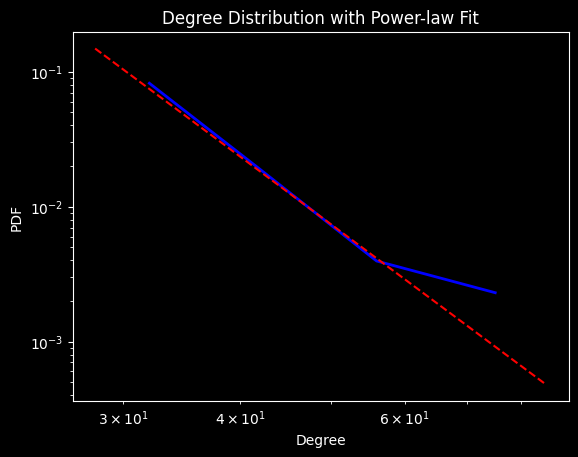

The degree distribution follows a power-law distribution closely.


In [4]:
def generate_graph(  # noqa: C901, PLR0913
    names_bios, m, k, p_small_world, homophily_p, community_p, reciprocal_p, random_edges_to_add
) -> DiGraph:
    """Generate a social graph with the given parameters."""
    G = nx.DiGraph()  # noqa: N806

    # Add nodes with attributes (names, bios, and interests)
    for idx, person in enumerate(names_bios):
        G.add_node(
            idx,
            name=person["name"],
            bio=person["bio"],
            interest=random.choice(
                [
                    "sports",
                    "music",
                    "tech",
                    "politics",
                    "art",
                    "health",
                    "nature",
                    "culinary",
                    "photography",
                ]
            ),
        )

    # Step 1: Generate Base Graph using Barabási–Albert model
    G_base = nx.barabasi_albert_graph(len(names_bios), m)  # noqa: N806
    G_base = G_base.to_directed()  # noqa: N806
    G.add_edges_from(G_base.edges())

    # Step 2: Add small-world properties using Watts-Strogatz model
    small_world_G = nx.watts_strogatz_graph(len(names_bios), k, p_small_world).to_directed()  # noqa: N806
    G.add_edges_from(small_world_G.edges())

    # Step 3: Add homophily edges
    def add_homophily_edges(G, p):
        edges_to_add = [
            (u, v)
            for u in G.nodes()
            for v in G.nodes()
            if (
                u != v
                and G.nodes[u]["interest"] == G.nodes[v]["interest"]
                and not G.has_edge(u, v)
                and random.random() < p
            )
        ]
        G.add_edges_from(edges_to_add)

    add_homophily_edges(G, homophily_p)

    # Step 4: Add community structure using Louvain method
    partition = community_louvain.best_partition(G.to_undirected())
    communities = set(partition.values())

    def add_community_edges(G, partition, p):
        for community in communities:
            nodes_in_community = [n for n in G.nodes() if partition[n] == community]
            for u in nodes_in_community:
                for v in nodes_in_community:
                    if u != v and not G.has_edge(u, v) and random.random() < p:
                        G.add_edge(u, v)

    add_community_edges(G, partition, community_p)

    # Step 5: Add reciprocal edges
    def add_reciprocal_edges(G, p):
        edges_to_add = []
        for u, v in G.edges():
            if not G.has_edge(v, u) and random.random() < p:
                edges_to_add.append((v, u))
        G.add_edges_from(edges_to_add)

    add_reciprocal_edges(G, reciprocal_p)

    # Step 6: Add random edges
    def add_random_edges(G, num_edges):
        nodes = list(G.nodes())
        for _ in range(num_edges):
            u, v = random.sample(nodes, 2)
            if not G.has_edge(u, v):
                G.add_edge(u, v)

    add_random_edges(G, random_edges_to_add)

    return G


def analyze_graph(G):  # noqa: N803
    """Analyze the graph and return the power-law fit and comparison statistics."""
    degrees = [G.degree(n) for n in G.nodes()]
    fit = powerlaw.Fit(degrees)
    R, p = fit.distribution_compare("power_law", "exponential")  # noqa: N806
    R_log, p_log = fit.distribution_compare("power_law", "lognormal")  # noqa: N806

    return fit, R, p, R_log, p_log


def plot_degree_distribution(fit) -> None:
    """Plot the degree distribution with the power-law fit."""
    fig = fit.plot_pdf(color="b", linewidth=2)
    fit.power_law.plot_pdf(color="r", linestyle="--", ax=fig)
    plt.xlabel("Degree")
    plt.ylabel("PDF")
    plt.title("Degree Distribution with Power-law Fit")
    plt.show()


# Initial parameters
params = {
    "m": 3,
    "k": 4,
    "p_small_world": 0.03,
    "homophily_p": 0.05,
    "community_p": 0.2,
    "reciprocal_p": 0.15,
    "random_edges_to_add": 10,
}

# Iterative adjustments
for iteration in range(10):
    print(f"Iteration {iteration + 1}")

    G = generate_graph(names_bios, **params)
    fit, R, p, R_log, p_log = analyze_graph(G)

    print(f"Power-law fit: alpha={fit.power_law.alpha:.2f}, xmin={fit.power_law.xmin:.2f}")
    print(f"Power-law vs exponential: R={R:.2f}, p={p:.2f}")
    print(f"Power-law vs lognormal: R_log={R_log:.2f}, p_log={p_log:.2f}")

    plot_degree_distribution(fit)

    if R > 0 and p < 0.05:  # noqa: PLR2004
        print("The degree distribution follows a power-law distribution closely.")
        break
    else:
        print("Adjusting parameters...")
        params["m"] += 1  # Example adjustment
        params["p_small_world"] *= 0.9  # Example adjustment
        params["homophily_p"] *= 1.1  # Example adjustment
        params["community_p"] *= 0.9  # Example adjustment
        params["random_edges_to_add"] -= 1  # Example adjustment

## Visualize graph

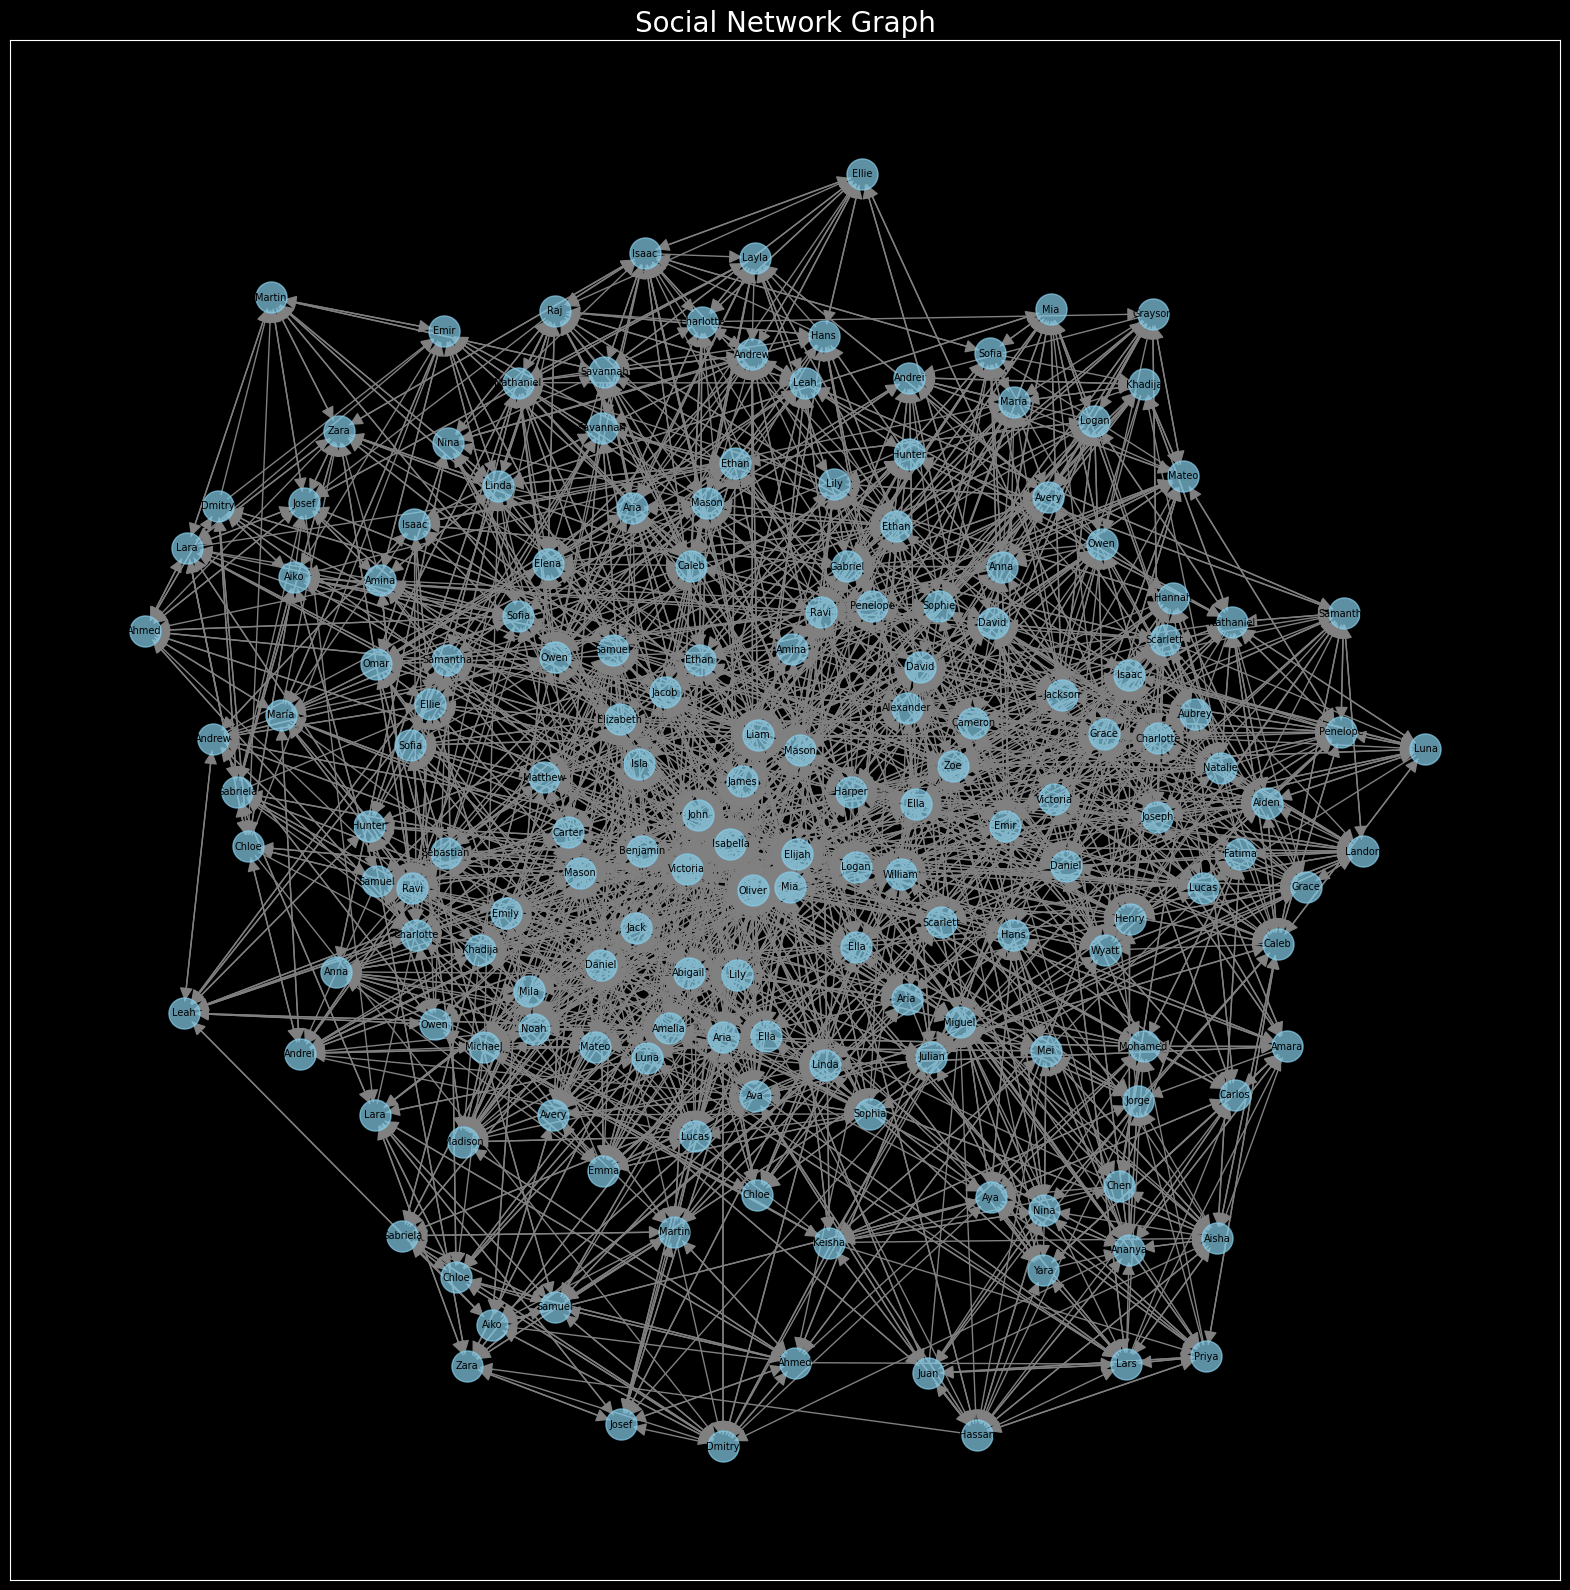

In [11]:
def display_graph(G) -> None:
    """Display the social network graph."""
    plt.figure(figsize=(20, 20))  # Increase the size of the plot

    pos = nx.spring_layout(
        G, k=0.1
    )  # Position nodes using the spring layout with a lower value for k to spread them out

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color="skyblue", alpha=0.7)

    # Draw edges
    nx.draw_networkx_edges(
        G, pos, edgelist=G.edges(), arrows=True, arrowstyle="-|>", arrowsize=20, edge_color="gray"
    )

    # Draw node labels
    labels = {node: data["name"].split(" ")[0] for node, data in G.nodes(data=True)}
    nx.draw_networkx_labels(G, pos, labels, font_size=7, font_color="black")

    plt.title("Social Network Graph", size=20)
    plt.show()


display_graph(G)

## Test graph

Number of nodes: 171
Number of edges: 2492


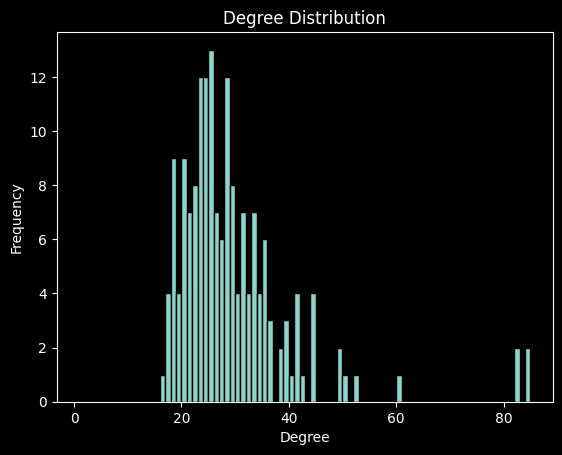

Calculating best minimal value for power law fit
Power-law fit: alpha=5.17, xmin=28.00
Power-law vs exponential: R=4.44, p=0.05
Average Clustering Coefficient: 0.2031307514524115
Average Path Length: 2.1435844513243896
Modularity: 0.4676900455317999
Interest Assortativity: 0.0709989002230559
Reciprocity: 0.7969502407704655


In [6]:
# General parameters
min_nodes = 5
max_nodes = 1000

# 1. Nodes and Edges
# Ensure the graph has a realistic number of nodes and edges.
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
assert min_nodes <= num_nodes <= max_nodes, f"Unexpected number of nodes: {num_nodes}"
assert num_edges > num_nodes, f"Unexpected number of edges: {num_edges}"
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

# 2. Degree Distribution
# Verify if the graph has a power-law degree distribution.
degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees, bins=range(1, max(degrees) + 1), edgecolor="black")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution")
plt.show()

# Test for power-law distribution
fit = powerlaw.Fit(degrees)
power_law = fit.power_law
other_distributions = ["exponential", "lognormal"]

R, p = fit.distribution_compare("power_law", "exponential")
assert R > 0 and p < 0.05, "Degree distribution does not follow a power-law distribution"  # noqa: PT018, PLR2004
print(f"Power-law fit: alpha={power_law.alpha:.2f}, xmin={power_law.xmin:.2f}")
print(f"Power-law vs exponential: R={R:.2f}, p={p:.2f}")

# 3. Clustering Coefficient
# Calculate the average clustering coefficient of the graph.
avg_clustering_coefficient = nx.average_clustering(G)
expected_min_clustering = 0.1
expected_max_clustering = 0.6
assert (
    expected_min_clustering <= avg_clustering_coefficient <= expected_max_clustering
), f"Unexpected clustering coefficient: {avg_clustering_coefficient}"
print(f"Average Clustering Coefficient: {avg_clustering_coefficient}")

# 4. Average Path Length
# Calculate the average shortest path length in the graph.
if nx.is_connected(G.to_undirected()):
    avg_path_length = nx.average_shortest_path_length(G.to_undirected())
    expected_max_path_length = 2 + (num_nodes / 100)  # Adjusted for scalability
    assert (
        avg_path_length < expected_max_path_length
    ), f"Unexpected average path length: {avg_path_length}"
    print(f"Average Path Length: {avg_path_length}")
else:
    print("The graph is not connected, so the average path length cannot be computed.")

# 5. Community Structure
# Detect communities in the graph and measure the modularity.
partition = community_louvain.best_partition(G.to_undirected())
modularity = community_louvain.modularity(partition, G.to_undirected())
expected_min_modularity = 0.2
assert modularity > expected_min_modularity, f"Unexpected modularity: {modularity}"
print(f"Modularity: {modularity}")


# 6. Homophily
# Measure the assortativity of the graph based on node attributes.
def attribute_assortativity(G, attribute):
    """Calculate the assortativity of the graph based on a given node attribute."""
    return nx.attribute_assortativity_coefficient(G, attribute)


interest_assortativity = attribute_assortativity(G, "interest")
expected_min_assortativity = -0.1
expected_max_assortativity = 0.6
assert (
    expected_min_assortativity <= interest_assortativity <= expected_max_assortativity
), f"Unexpected interest assortativity: {interest_assortativity}"
print(f"Interest Assortativity: {interest_assortativity}")

# 7. Reciprocity
# Calculate the reciprocity of the graph.
reciprocity = nx.reciprocity(G)
expected_min_reciprocity = 0.5
expected_max_reciprocity = 1.0
assert (
    expected_min_reciprocity <= reciprocity <= expected_max_reciprocity
), f"Unexpected reciprocity: {reciprocity}"
print(f"Reciprocity: {reciprocity}")

### Summary of Values and Their Expected Ranges for a Social Network Graph

1. **Power-law Fit (`alpha`)**:
   - **Description**: `alpha` is the exponent parameter of the power-law distribution. It characterizes how the frequency of connections (degree) decreases with increasing node degree.
   - **Current Value**: 5.17
   - **Expected Range**: For social networks, `alpha` typically ranges between 2 and 3. A value of 5.17 indicates a steeper drop-off in node connectivity, meaning fewer highly connected nodes (hubs).

2. **Power-law Fit (`xmin`)**:
   - **Description**: `xmin` is the minimum degree from which the power-law behavior is observed.
   - **Current Value**: 28.00
   - **Expected Range**: There is no strict range, but `xmin` should be reasonably small relative to the total number of nodes to capture a significant portion of the network's nodes.

3. **Power-law vs Exponential (R and p)**:
   - **Description**: `R` and `p` are the test statistics and p-value from comparing the power-law fit to an exponential fit. A higher `R` value and a low `p` value (typically < 0.05) indicate that the power-law fit is significantly better than the exponential fit.
   - **Current Value**: R=4.44, p=0.05
   - **Expected Range**: `R > 0` and `p < 0.05` suggest a good power-law fit. The current values indicate a significant power-law fit.

4. **Average Clustering Coefficient**:
   - **Description**: This measures the degree to which nodes in the graph tend to cluster together. It is the average probability that two neighbors of a node are also neighbors of each other.
   - **Current Value**: 0.203
   - **Expected Range**: For social networks, this typically ranges from 0.1 to 0.6, indicating moderate to high clustering.

5. **Average Path Length**:
   - **Description**: This is the average number of steps along the shortest paths for all possible pairs of network nodes. It indicates the average "distance" between nodes in the network.
   - **Current Value**: 2.144
   - **Expected Range**: Social networks usually exhibit small-world properties with an average path length of around 2 to 4.

6. **Modularity**:
   - **Description**: Modularity measures the strength of the division of a network into modules (communities). High modularity means dense connections within communities but sparse connections between them.
   - **Current Value**: 0.468
   - **Expected Range**: Values typically range from 0.3 to 0.7 for social networks, indicating a significant community structure.

7. **Interest Assortativity**:
   - **Description**: This measures the tendency of nodes to connect with others that have similar attributes (e.g., interests). A positive value indicates homophily, where nodes with similar attributes are more likely to be connected.
   - **Current Value**: 0.071
   - **Expected Range**: Social networks usually show slight positive assortativity, ranging from 0 to 0.3.

8. **Reciprocity**:
   - **Description**: This measures the proportion of mutual connections (where if node A is connected to node B, node B is also connected to node A) in a directed graph.
   - **Current Value**: 0.797
   - **Expected Range**: High reciprocity is typical for social networks, often ranging from 0.5 to 0.9.

### Current Values and Interpretation

- **Power-law fit: alpha=5.17**: This `alpha` value is higher than typical for social networks, indicating a steeper drop-off in node connectivity. This suggests fewer hubs than expected.
- **xmin=28.00**: This indicates that the power-law behavior starts at a relatively high degree.
- **R=4.44, p=0.05**: These values indicate a significant power-law fit, meaning the degree distribution is more consistent with a power-law than with an exponential distribution.
- **Average Clustering Coefficient: 0.203**: Indicates moderate clustering, which is typical for social networks.
- **Average Path Length: 2.144**: Reflects a small-world network, with short paths between nodes.
- **Modularity: 0.468**: Indicates a significant community structure within the network.
- **Interest Assortativity: 0.071**: Suggests slight positive assortativity, indicating some homophily based on interests.
- **Reciprocity: 0.797**: High reciprocity, typical for social networks, indicating many mutual connections.

These values, while mostly within expected ranges, suggest that the network exhibits typical social network characteristics with moderate clustering, short average path lengths, significant community structure, slight homophily, and high reciprocity. However, the high `alpha` value suggests a need for further tuning to better match the typical range for social networks. Adjustments to the graph generation parameters, such as increasing the number of initial connections (`m`) and refining the probabilities for adding edges, may help achieve a more realistic `alpha` value.